
В данном домашнем задании вам необходимо обучить языковую модель (не более 1B параметров) решать примеры на сложение как можно более длинных чисел.

**Ожидаемый результат.** Необходимо предоставить код, а также технический отчет, содержащий описание метода и используемых данных, оценку качества (точность сложения).

**Пояснения:**

1. Можно использовать любые предобученные модели, можно их файнтюнить, обучать с нуля, адаптировать любым другим способом или брать как есть. Главное, чтобы все использованные вами идеи, код или веса моделей были описаны в приложенном отчете со ссылкой на источник.

2. Мы ожидаем, что ваш код принимает на вход два числа (в виде строк их десятичной записи) и выдает ответ в любом человекочитаемом виде. Однако, если ваша модель работает с входом в виде предложения на естественном языке, это тоже нормально, главное, чтобы это было описано в отчете.

3. Можно оценить качество работы алгоритма, посчитав accuracy на случайных множествах чисел разной длины. Если вам кажется более подходящей другая метрика, мы примем ваше решение. Опишите вашу метрику и аргументируйте выбор в отчете.

**Подсказка:** в качестве ориентира можете использовать следующий репозиторий (https://github.com/liutiedong/goat). В нем реализована сборка датасета для обучения и самообучения.

### Разбаловка

- [2 балла] Сбор датасета для обучения.  
- [3 балла] Реализация скрипта модели.
- [3 балла] Создание обученной модели с качеством (100% на числах длины < 10).
- [2 баллов] Валидация модели.

Для валидации можно использовать и готовую языковую модель без получения баллов за третий пункт.

In [2]:
import json
import random
from typing import List, Dict
import time

def generate_addition_dataset_full(
    max_digits: int = 16,
    examples_per_combination: int = 300
    ) -> List[Dict]:
    """
    Генерирует датасет для сложения с регулируемым числом примеров на каждую комбинацию
    """

    print("Генерируем")
    start_time = time.time()

    dataset = []

    print("Слой 1: базовая выборка")
    for i in range(1, max_digits):
        for j in range(i, max_digits):
            for _ in range(examples_per_combination):
                num1 = random.randint(10**(i-1), 10**i - 1)
                num2 = random.randint(10**(j-1), 10**j - 1)

                answer = num1 + num2
                dataset.append({
                    "input": f"{num1} + {num2}",
                    "output": f"{num1} + {num2} = {answer}",
                    "answer": str(answer),
                    "num_length": max(i, j)
                })

    print("Слой 2: усиление средней сложности")
    for i in range(3, 9):
        for j in range(i, 9):
            for _ in range(examples_per_combination):
                num1 = random.randint(10**(i-1), 10**i - 1)
                num2 = random.randint(10**(j-1), 10**j - 1)

                answer = num1 + num2
                dataset.append({
                    "input": f"{num1} + {num2}",
                    "output": f"{num1} + {num2} = {answer}",
                    "answer": str(answer),
                    "num_length": max(i, j)
                })

    print("Слой 3: усиление высокой сложности")
    for i in range(6, max_digits):
        for j in range(i, max_digits):
            for _ in range(examples_per_combination):
                num1 = random.randint(10**(i-1), 10**i - 1)
                num2 = random.randint(10**(j-1), 10**j - 1)

                answer = num1 + num2
                dataset.append({
                    "input": f"{num1} + {num2}",
                    "output": f"{num1} + {num2} = {answer}",
                    "answer": str(answer),
                    "num_length": max(i, j)
                })

    print("Слой 4: усиление экстремальной сложности")
    for i in range(10, max_digits):
        for j in range(i, max_digits):
            for _ in range(examples_per_combination):
                num1 = random.randint(10**(i-1), 10**i - 1)
                num2 = random.randint(10**(j-1), 10**j - 1)

                answer = num1 + num2
                dataset.append({
                    "input": f"{num1} + {num2}",
                    "output": f"{num1} + {num2} = {answer}",
                    "answer": str(answer),
                    "num_length": max(i, j)
                })

    print("Слой 5: финальное усиление")
    for i in range(12, max_digits):
        for j in range(i, max_digits):
            for _ in range(examples_per_combination):
                num1 = random.randint(10**(i-1), 10**i - 1)
                num2 = random.randint(10**(j-1), 10**j - 1)

                answer = num1 + num2
                dataset.append({
                    "input": f"{num1} + {num2}",
                    "output": f"{num1} + {num2} = {answer}",
                    "answer": str(answer),
                    "num_length": max(i, j)
                })

    elapsed = time.time() - start_time
    print(f"Генерация завершена за {elapsed:.1f} сек")

    print("Перемешиваем датасет")
    random.shuffle(dataset)

    return dataset

random.seed(42)
dataset = generate_addition_dataset_full(max_digits=16, examples_per_combination=300)
print(f"\nВсего примеров: {len(dataset):,}")

by_length = {}
for ex in dataset:
    length = ex['num_length']
    by_length[length] = by_length.get(length, 0) + 1

print("\nРаспределение по сложности:")
for length in sorted(by_length.keys()):
    count = by_length[length]
    percent = 100 * count / len(dataset)
    bar = "█" * (count // 1000)
    print(f"{length:2d}-digit: {count:6d} ({percent:5.1f}%) {bar}")

train_size = int(len(dataset) * 0.9)
train_dataset = dataset[:train_size]
val_dataset = dataset[train_size:]

print(f"\nSplit:")
print(f"Train: {len(train_dataset):,} примеров")
print(f"Val: {len(val_dataset):,} примеров")

print(f"\nСохраняем датасеты")
with open('train_dataset.json', 'w') as f:
    json.dump(train_dataset, f)
print(f"train_dataset.json ({len(train_dataset):,} примеров)")

with open('val_dataset.json', 'w') as f:
    json.dump(val_dataset, f)
print(f"val_dataset.json ({len(val_dataset):,} примеров)")

print("\nПримеры из датасета:")
for i in range(5):
    ex = train_dataset[i]
    print(f"{ex['input']} → {ex['answer']}")


Генерируем
Слой 1: базовая выборка
Слой 2: усиление средней сложности
Слой 3: усиление высокой сложности
Слой 4: усиление экстремальной сложности
Слой 5: финальное усиление
Генерация завершена за 0.4 сек
Перемешиваем датасет

Всего примеров: 68,100

Распределение по сложности:
 1-digit:    300 (  0.4%) 
 2-digit:    600 (  0.9%) 
 3-digit:   1200 (  1.8%) █
 4-digit:   1800 (  2.6%) █
 5-digit:   2400 (  3.5%) ██
 6-digit:   3300 (  4.8%) ███
 7-digit:   4200 (  6.2%) ████
 8-digit:   5100 (  7.5%) █████
 9-digit:   3900 (  5.7%) ███
10-digit:   4800 (  7.0%) ████
11-digit:   5700 (  8.4%) █████
12-digit:   6900 ( 10.1%) ██████
13-digit:   8100 ( 11.9%) ████████
14-digit:   9300 ( 13.7%) █████████
15-digit:  10500 ( 15.4%) ██████████

Split:
Train: 61,290 примеров
Val: 6,810 примеров

Сохраняем датасеты
train_dataset.json (61,290 примеров)
val_dataset.json (6,810 примеров)

Примеры из датасета:
4 + 646903815845 → 646903815849
1254051952570 + 1380408128033 → 2634460080603
19989045594715

In [ ]:
import json
import torch
from datasets import Dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling,
)

from google.colab import drive
drive.mount('/content/drive')

BASE_MODEL = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
OUTPUT_DIR = "./arithmetic_model"
BATCH_SIZE = 8
MICRO_BATCH_SIZE = 2
NUM_EPOCHS = 2
LEARNING_RATE = 2e-4
CUTOFF_LEN = 128
LORA_R = 8
LORA_ALPHA = 16
LORA_DROPOUT = 0.05

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

print("Загружаем модель и токенизатор")
model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

model = prepare_model_for_kbit_training(model)

lora_config = LoraConfig(
    r=LORA_R,
    lora_alpha=LORA_ALPHA,
    lora_dropout=LORA_DROPOUT,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "v_proj"],
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

print("Загружаем датасеты")
with open('train_dataset.json', 'r') as f:
    train_data = json.load(f)
with open('val_dataset.json', 'r') as f:
    val_data = json.load(f)

def create_simple_datasets(train_data, val_data, max_examples=5000):
    """Создаем уменьшенные датасеты для быстрого обучения"""
    simple_train = [ex for ex in train_data if ex['num_length'] <= 8][:max_examples]
    simple_val = [ex for ex in val_data if ex['num_length'] <= 8][:1000]

    train_dataset = Dataset.from_dict({
        'input': [ex['input'] for ex in simple_train],
        'output': [ex['answer'] for ex in simple_train],
    })
    val_dataset = Dataset.from_dict({
        'input': [ex['input'] for ex in simple_val],
        'output': [ex['answer'] for ex in simple_val],
    })

    return train_dataset, val_dataset

train_dataset, val_dataset = create_simple_datasets(train_data, val_data)

def generate_prompt(input_text: str, output_text: str = None) -> str:
    if output_text:
        return f"Calculate: {input_text}\nAnswer: {output_text}"
    else:
        return f"Calculate: {input_text}\nAnswer:"

def tokenize_function(example):
    full_text = generate_prompt(example['input'], example['output'])
    tokenized = tokenizer(
        full_text,
        max_length=CUTOFF_LEN,
        padding="max_length",
        truncation=True,
    )

    instruction_text = generate_prompt(example['input'])
    instruction_tokens = tokenizer(
        instruction_text,
        max_length=CUTOFF_LEN,
        truncation=True,
    )

    instruction_len = len(instruction_tokens['input_ids'])
    labels = tokenized['input_ids'].copy()
    labels[:instruction_len] = [-100] * instruction_len

    tokenized['labels'] = labels
    return tokenized

print("Токенизируем датасеты")
train_dataset = train_dataset.map(tokenize_function, remove_columns=['input', 'output'])
val_dataset = val_dataset.map(tokenize_function, remove_columns=['input', 'output'])

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=MICRO_BATCH_SIZE,
    per_device_eval_batch_size=MICRO_BATCH_SIZE,
    gradient_accumulation_steps=BATCH_SIZE // MICRO_BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    warmup_steps=100,
    logging_steps=50,
    save_steps=500,
    eval_steps=500,
    eval_strategy="steps",
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True,
    optim="adamw_torch",
    seed=42,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

model.config.use_cache = False

print("Начинаем обучение")
trainer.train()
print("Обучение завершено")

trainer.save_model()
tokenizer.save_pretrained(OUTPUT_DIR)
print(f"Модель сохранена в {OUTPUT_DIR}")

import shutil
shutil.copytree(OUTPUT_DIR, f'/content/drive/MyDrive/{OUTPUT_DIR}', dirs_exist_ok=True)
print(f"Модель сохранена {OUTPUT_DIR}")

Mounted at /content/drive
Device: cuda
Загружаем модель и токенизатор
trainable params: 1,126,400 || all params: 1,101,174,784 || trainable%: 0.1023
Загружаем датасеты
Токенизируем датасеты


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Начинаем обучение


/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
500,1.025700,1.020941
1000,1.012400,0.996266


/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Обучение завершено
Модель сохранена в ./arithmetic_model
Модель сохранена ./arithmetic_model


In [ ]:
import json
import re
from tqdm import tqdm
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

class ArithmeticModel:
    def __init__(self, model_path):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Загружаем модель")

        try:
            self.model = AutoModelForCausalLM.from_pretrained(
                "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
                device_map="auto",
                torch_dtype=torch.float16,
                trust_remote_code=True
            )

            self.model = PeftModel.from_pretrained(self.model, model_path)
            self.tokenizer = AutoTokenizer.from_pretrained(model_path)
            self.model.eval()

        except Exception as e:
            print(f"Ошибка при загрузке модели: {e}")

    def generate_prompt(self, input_text):
        return f"Calculate: {input_text}\nAnswer:"

    def add_numbers(self, a, b):
        try:
            input_text = f"{a} + {b}"
            prompt = self.generate_prompt(input_text)

            inputs = self.tokenizer(prompt, return_tensors="pt").to(self.device)

            with torch.no_grad():
                outputs = self.model.generate(
                    **inputs,
                    max_new_tokens=20,
                    temperature=0.1,
                    do_sample=False,
                    pad_token_id=self.tokenizer.eos_token_id
                )

            response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            if "Answer:" in response:
                answer_part = response.split("Answer:")[1].strip()
                numbers = re.findall(r'\d+', answer_part)
                if numbers:
                    return numbers[0]

            return "0"
        except Exception as e:
            print(f"Ошибка при генерации: {e}")
            return "0"

def validate_model(
    model_path="./arithmetic_model",
    test_data_path="val_dataset.json",
    max_tests=200
    ):
    """Валидация модели на тестовых данных"""

    print("Инициализация модели")
    model = ArithmeticModel(model_path)

    print(f"Загружаем {test_data_path}")
    with open(test_data_path, 'r') as f:
        test_data = json.load(f)

    test_subset = [ex for ex in test_data if ex['num_length'] <= 10][:max_tests]
    print(f"Тестируем на {len(test_subset)} примерах")

    correct = 0
    results_by_length = {}

    for example in tqdm(test_subset, desc="Валидация"):
        input_text = example['input']
        expected = example['answer']

        numbers = re.findall(r'\d+', input_text)
        if len(numbers) >= 2:
            a, b = numbers[0], numbers[1]
            predicted = model.add_numbers(a, b)

            num_length = max(len(a), len(b))
            if num_length not in results_by_length:
                results_by_length[num_length] = {'correct': 0, 'total': 0}

            results_by_length[num_length]['total'] += 1
            if predicted == expected:
                correct += 1
                results_by_length[num_length]['correct'] += 1

    accuracy = correct / len(test_subset) * 100

    print(f"РЕЗУЛЬТАТЫ ВАЛИДАЦИИ:")
    print(f"Общая точность: {accuracy:.2f}% ({correct}/{len(test_subset)})")

    print(f"\nТочность по длине чисел:")
    for length in sorted(results_by_length.keys()):
        stats = results_by_length[length]
        acc = stats['correct'] / stats['total'] * 100
        print(f"Длина {length}: {acc:.2f}% ({stats['correct']}/{stats['total']})")

    return accuracy

print("Запускаем валидацию")
accuracy = validate_model("./arithmetic_model", "val_dataset.json")

def quick_test():
    print("ТЕСТ НА ПРОСТЫХ ПРИМЕРАХ:")

    model = ArithmeticModel("./arithmetic_model")

    test_cases = [
        ("12", "34"),
        ("5", "7"),
        ("100", "200"),
        ("999", "1"),
        ("25", "75"),
        ("8", "15"),
    ]

    correct = 0
    for a, b in test_cases:
        predicted = model.add_numbers(a, b)
        expected = str(int(a) + int(b))
        status = "True" if predicted == expected else f"False (ожидалось {expected})"
        if predicted == expected:
            correct += 1
        print(f"{a} + {b} = {predicted} {status}")

    print(f"Точность на простых примерах: {correct/len(test_cases)*100:.1f}%")

quick_test()

Запускаем валидацию
Инициализация модели
Загружаем модель
Загружаем val_dataset.json
Тестируем на 200 примерах


Валидация: 100%|██████████| 200/200 [02:46<00:00,  1.20it/s]


РЕЗУЛЬТАТЫ ВАЛИДАЦИИ:
Общая точность: 42.00% (84/200)

Точность по длине чисел:
Длина 1: 100.00% (2/2)
Длина 2: 85.71% (6/7)
Длина 3: 81.82% (9/11)
Длина 4: 90.00% (9/10)
Длина 5: 45.00% (9/20)
Длина 6: 57.69% (15/26)
Длина 7: 54.55% (12/22)
Длина 8: 58.82% (20/34)
Длина 9: 8.00% (2/25)
Длина 10: 0.00% (0/43)
ТЕСТ НА ПРОСТЫХ ПРИМЕРАХ:
Загружаем модель
12 + 34 = 46 True
5 + 7 = 12 True
100 + 200 = 300 True
999 + 1 = 1099 False (ожидалось 1000)
25 + 75 = 100 True
8 + 15 = 23 True
Точность на простых примерах: 83.3%


In [3]:
import json
import torch
from datasets import Dataset
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling,
)
import os

os.environ["WANDB_DISABLED"] = "true"

BASE_MODEL = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
OUTPUT_DIR = "./arithmetic_model_deep"
BATCH_SIZE = 16
MICRO_BATCH_SIZE = 4
NUM_EPOCHS = 3
LEARNING_RATE = 1e-4
CUTOFF_LEN = 128
LORA_R = 16
LORA_ALPHA = 32
LORA_DROPOUT = 0.05

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

print("Загружаем модель и токенизатор")
model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

model = prepare_model_for_kbit_training(model)

lora_config = LoraConfig(
    r=LORA_R,
    lora_alpha=LORA_ALPHA,
    lora_dropout=LORA_DROPOUT,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

print("Загружаем датасеты")
with open('train_dataset.json', 'r') as f:
    train_data = json.load(f)
with open('val_dataset.json', 'r') as f:
    val_data = json.load(f)

def create_balanced_datasets(train_data, val_data):
    """Создаем сбалансированный датасет с акцентом на сложные случаи"""

    easy_train = [ex for ex in train_data if ex['num_length'] <= 7][:4000]
    easy_val = [ex for ex in val_data if ex['num_length'] <= 7][:800]

    medium_train = [ex for ex in train_data if 8 <= ex['num_length'] <= 10][:6000]
    medium_val = [ex for ex in val_data if 8 <= ex['num_length'] <= 10][:1200]

    hard_train = [ex for ex in train_data if 11 <= ex['num_length'] <= 12][:3000]
    hard_val = [ex for ex in val_data if 11 <= ex['num_length'] <= 12][:600]

    carry_over_cases = []
    for _ in range(1000):
        nines_count = random.randint(2, 8)
        num1 = int('9' * nines_count)
        num2 = random.randint(1, 100)
        answer = num1 + num2
        carry_over_cases.append({
            "input": f"{num1} + {num2}",
            "output": f"{num1} + {num2} = {answer}",
            "answer": str(answer),
            "num_length": len(str(num1))
        })

    balanced_train = easy_train + medium_train + hard_train + carry_over_cases
    balanced_val = easy_val + medium_val + hard_val

    random.shuffle(balanced_train)
    random.shuffle(balanced_val)

    print(f"Итоговый размер датасета:")
    print(f"Train: {len(balanced_train)} примеров")
    print(f"Val: {len(balanced_val)} примеров")

    length_dist_train = {}
    for ex in balanced_train:
        length = ex['num_length']
        length_dist_train[length] = length_dist_train.get(length, 0) + 1

    print("\nРаспределение по длинам в train:")
    for length in sorted(length_dist_train.keys()):
        count = length_dist_train[length]
        percent = count / len(balanced_train) * 100
        print(f"  Длина {length}: {count} примеров ({percent:.1f}%)")

    return balanced_train, balanced_val

train_data_balanced, val_data_balanced = create_balanced_datasets(train_data, val_data)

train_dataset = Dataset.from_dict({
    'input': [ex['input'] for ex in train_data_balanced],
    'output': [ex['answer'] for ex in train_data_balanced],
})
val_dataset = Dataset.from_dict({
    'input': [ex['input'] for ex in val_data_balanced],
    'output': [ex['answer'] for ex in val_data_balanced],
})

def generate_prompt(input_text: str, output_text: str = None) -> str:
    if output_text:
        return f"""### Arithmetic Problem:
Calculate the sum: {input_text}

### Solution:
{output_text}"""
    else:
        return f"""### Arithmetic Problem:
Calculate the sum: {input_text}

### Solution:
"""

def tokenize_function(example):
    full_text = generate_prompt(example['input'], example['output'])
    tokenized = tokenizer(
        full_text,
        max_length=CUTOFF_LEN,
        padding="max_length",
        truncation=True,
    )

    instruction_text = generate_prompt(example['input'])
    instruction_tokens = tokenizer(
        instruction_text,
        max_length=CUTOFF_LEN,
        truncation=True,
    )

    instruction_len = len(instruction_tokens['input_ids'])
    labels = tokenized['input_ids'].copy()
    labels[:instruction_len] = [-100] * instruction_len

    tokenized['labels'] = labels
    return tokenized

print("Токенизируем датасеты")
train_dataset = train_dataset.map(tokenize_function, remove_columns=['input', 'output'])
val_dataset = val_dataset.map(tokenize_function, remove_columns=['input', 'output'])

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=MICRO_BATCH_SIZE,
    per_device_eval_batch_size=MICRO_BATCH_SIZE,
    gradient_accumulation_steps=BATCH_SIZE // MICRO_BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    warmup_ratio=0.1,
    logging_steps=50,
    save_steps=500,
    eval_steps=500,
    eval_strategy="steps",
    save_total_limit=3,
    load_best_model_at_end=True,
    fp16=True,
    optim="adamw_torch",
    seed=42,
    report_to="none",
    logging_strategy="steps",
    remove_unused_columns=False,
    dataloader_pin_memory=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
)

model.config.use_cache = False

print("НАЧИНАЕМ ОБУЧЕНИЕ")
print(f"Модель: {BASE_MODEL}")
print(f"Эпохи: {NUM_EPOCHS}")
print(f"Размер train: {len(train_dataset)}")
print(f"Размер validation: {len(val_dataset)}")

trainer.train()
print("Обучение завершено")

trainer.save_model()
tokenizer.save_pretrained(OUTPUT_DIR)
print(f"Модель сохранена в {OUTPUT_DIR}")

from google.colab import drive
drive.mount('/content/drive')
import shutil
shutil.copytree(OUTPUT_DIR, f'/content/drive/MyDrive/{OUTPUT_DIR}', dirs_exist_ok=True)
print(f"Модель сохранена {OUTPUT_DIR}")

Device: cuda
Загружаем модель и токенизатор
trainable params: 4,505,600 || all params: 1,104,553,984 || trainable%: 0.4079
Загружаем датасеты
Итоговый размер датасета:
Train: 14000 примеров
Val: 2600 примеров

Распределение по длинам в train:
  Длина 1: 86 примеров (0.6%)
  Длина 2: 316 примеров (2.3%)
  Длина 3: 466 примеров (3.3%)
  Длина 4: 650 примеров (4.6%)
  Длина 5: 863 примеров (6.2%)
  Длина 6: 1102 примеров (7.9%)
  Длина 7: 1379 примеров (9.8%)
  Длина 8: 2344 примеров (16.7%)
  Длина 9: 1683 примеров (12.0%)
  Длина 10: 2111 примеров (15.1%)
  Длина 11: 1390 примеров (9.9%)
  Длина 12: 1610 примеров (11.5%)
Токенизируем датасеты


Map:   0%|          | 0/14000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2600 [00:00<?, ? examples/s]

НАЧИНАЕМ ОБУЧЕНИЕ
Модель: TinyLlama/TinyLlama-1.1B-Chat-v1.0
Эпохи: 3
Размер train: 14000
Размер validation: 2600


/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss
500,0.849600,0.883667
1000,0.814500,0.841895
1500,0.798100,0.832400
2000,0.805800,0.829155
2500,0.782400,0.824738


/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/pyt

Обучение завершено
Модель сохранена в ./arithmetic_model_deep
Mounted at /content/drive
Модель сохранена ./arithmetic_model_deep


In [5]:
import json
import re
from tqdm import tqdm
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

class ArithmeticModel:
    def __init__(self, model_path):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Загружаем модель")

        try:
            self.model = AutoModelForCausalLM.from_pretrained(
                "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
                device_map="auto",
                torch_dtype=torch.float16,
                trust_remote_code=True
            )

            self.model = PeftModel.from_pretrained(self.model, model_path)
            self.tokenizer = AutoTokenizer.from_pretrained(model_path)
            self.model.eval()

        except Exception as e:
            print(f"Ошибка при загрузке модели: {e}")

    def generate_prompt(self, input_text):
        return f"Calculate: {input_text}\nAnswer:"

    def add_numbers(self, a, b):
        try:
            input_text = f"{a} + {b}"
            prompt = self.generate_prompt(input_text)

            inputs = self.tokenizer(prompt, return_tensors="pt").to(self.device)

            with torch.no_grad():
                outputs = self.model.generate(
                    **inputs,
                    max_new_tokens=20,
                    temperature=0.1,
                    do_sample=False,
                    pad_token_id=self.tokenizer.eos_token_id
                )

            response = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            if "Answer:" in response:
                answer_part = response.split("Answer:")[1].strip()
                numbers = re.findall(r'\d+', answer_part)
                if numbers:
                    return numbers[0]

            return "0"
        except Exception as e:
            print(f"Ошибка при генерации: {e}")
            return "0"

def validate_model(
    model_path="./arithmetic_model_deep",
    test_data_path="val_dataset.json",
    max_tests=200
    ):
    """Валидация модели на тестовых данных"""

    print("Инициализация модели")
    model = ArithmeticModel(model_path)

    print(f"Загружаем {test_data_path}")
    with open(test_data_path, 'r') as f:
        test_data = json.load(f)

    test_subset = [ex for ex in test_data if ex['num_length'] <= 10][:max_tests]
    print(f"Тестируем на {len(test_subset)} примерах")

    correct = 0
    results_by_length = {}

    for example in tqdm(test_subset, desc="Валидация"):
        input_text = example['input']
        expected = example['answer']

        numbers = re.findall(r'\d+', input_text)
        if len(numbers) >= 2:
            a, b = numbers[0], numbers[1]
            predicted = model.add_numbers(a, b)

            num_length = max(len(a), len(b))
            if num_length not in results_by_length:
                results_by_length[num_length] = {'correct': 0, 'total': 0}

            results_by_length[num_length]['total'] += 1
            if predicted == expected:
                correct += 1
                results_by_length[num_length]['correct'] += 1

    accuracy = correct / len(test_subset) * 100

    print(f"РЕЗУЛЬТАТЫ ВАЛИДАЦИИ:")
    print(f"Общая точность: {accuracy:.2f}% ({correct}/{len(test_subset)})")

    print(f"\nТочность по длине чисел:")
    for length in sorted(results_by_length.keys()):
        stats = results_by_length[length]
        acc = stats['correct'] / stats['total'] * 100
        print(f"Длина {length}: {acc:.2f}% ({stats['correct']}/{stats['total']})")

    return accuracy

print("Запускаем валидацию")
accuracy = validate_model("./arithmetic_model_deep", "val_dataset.json")

def quick_test():
    print("ТЕСТ НА ПРОСТЫХ ПРИМЕРАХ:")

    model = ArithmeticModel("./arithmetic_model_deep")

    test_cases = [
        ("12", "34"),
        ("5", "7"),
        ("100", "200"),
        ("999", "1"),
        ("25", "75"),
        ("8", "15"),
    ]

    correct = 0
    for a, b in test_cases:
        predicted = model.add_numbers(a, b)
        expected = str(int(a) + int(b))
        status = "True" if predicted == expected else f"False (ожидалось {expected})"
        if predicted == expected:
            correct += 1
        print(f"{a} + {b} = {predicted} {status}")

    print(f"Точность на простых примерах: {correct/len(test_cases)*100:.1f}%")

quick_test()

`torch_dtype` is deprecated! Use `dtype` instead!


Запускаем валидацию
Инициализация модели
Загружаем модель
Загружаем val_dataset.json
Тестируем на 200 примерах


Валидация: 100%|██████████| 200/200 [03:45<00:00,  1.13s/it]


РЕЗУЛЬТАТЫ ВАЛИДАЦИИ:
Общая точность: 25.00% (50/200)

Точность по длине чисел:
Длина 1: 100.00% (2/2)
Длина 2: 85.71% (6/7)
Длина 3: 72.73% (8/11)
Длина 4: 60.00% (6/10)
Длина 5: 40.00% (8/20)
Длина 6: 26.92% (7/26)
Длина 7: 13.64% (3/22)
Длина 8: 14.71% (5/34)
Длина 9: 4.00% (1/25)
Длина 10: 9.30% (4/43)
ТЕСТ НА ПРОСТЫХ ПРИМЕРАХ:
Загружаем модель
12 + 34 = 46 True
5 + 7 = 12 True
100 + 200 = 300 True
999 + 1 = 1000 True
25 + 75 = 100 True
8 + 15 = 23 True
Точность на простых примерах: 100.0%


### Описание вашего решения

[TODO]

### 1. Генерация датасета для обучения
- Основная идея: не генерить просто набор случайных примеров, а обеспечить многоуровневый подход с постепенным повышением сложности.
- Простые числа - 3% датасета. Средние - 25%. Сложные - 72%. Общий размер получился около 68к примеров.
- Split: 90% train / 10% validation

### 2. Обучаем модель в первый раз
- Ввиду ограниченности бесплатного Colab нужно было быстро понять в какую сторону двигаться, поэтому в данном обучении упор был сделан на экономию ресурса и скорость.
- Берём не слишком тяжёлую `TinyLlama 1.1B`, 4-битную квантизацию, LoRA адаптация.
- Ограничиваем обучение числами до 8 знаков, 5000 примеров для обучения и 1000 для валидации, простой промпт `Calculate: X + Y\nAnswer: Z`.
- Прочие настройки параметров для экономии ресурса.

### 3. Валидация первой модели
- Результат в целом адекватный, но есть большой простор для дальнейшей работы: общая точность 42%, хорошо справляется с числами по 1-4 знака, до 60% на 5-8 знаках, ожидаемо полностью проваливается на более 8 знаках.
- `999 + 1 = 1099` вместо 1000. Модель понимает, что нужно прибавить, но ошибается в механизме переноса разрядов.

### 4. Обучаем модель во второй раз
- Решено было попробовать обучить с нуля с другим набором вводных: увеличим сложность и количество эпох, усложним промпт.
- Попробуем другое распределение долей в датасете: сделаем упор на средние и сложные примеры. Специально добавим примеры с переносом разрядов.

### 5. Валидация второй модели
- Немного неожиданный и противоречивый результат.
- Отличная точность на простых, есть прогресс на сложных примерах. Решена проблема с переносом.
- Однако общая точность упала до 25%: резкий провал в среднем диапазоне.

### 6. Анализ проблемы
- Вероятно, модель могла переобучиться на специфических случаях типа переноса разрядов и потеряла обобщающую способность на обычных числах средней длины.
- Увеличение сложности LoRA могло повлечь за собой нестабильность.
- Плохо сбалансирован датасет.

### 7. Возможные пути решения
- В целом довольно типичная картина, когда оптимизация под конкретную задачу поломала общие возможности модели.
- Надо хорошо подумать как сбалансировать датасет.
- Поэкспериментировать с поэтапным дообучением адаптера с постепенным повышением сложности. Наверняка это поможет, но требует много ресурса.
- Увеличить размер тестовой выборки, проводить и анализировать валидацию после каждой эпохи.

### 8. Реализация хостинга
- При помощи Gradio создаём хостинг с публичной ссылкой на простой интерфейс для взаимодействия с моделью.

### *[1 балл] Дополнительное задание

Реализовать хостинг вашей модели на gradio.

In [3]:
import gradio as gr
import torch
import re
from transformers import AutoModelForCausalLM, AutoTokenizer

def create_interface():
    model = AutoModelForCausalLM.from_pretrained("./arithmetic_model_deep")
    tokenizer = AutoTokenizer.from_pretrained("./arithmetic_model_deep")
    model.eval()

    def calculate_simple(a, b):
        try:
            prompt = f"Calculate: {a} + {b}\nAnswer:"
            inputs = tokenizer(prompt, return_tensors="pt")

            with torch.no_grad():
                outputs = model.generate(
                    **inputs,
                    max_new_tokens=20,
                    temperature=0.1,
                    do_sample=False,
                    pad_token_id=tokenizer.eos_token_id
                )

            response = tokenizer.decode(outputs[0], skip_special_tokens=True)
            expected = str(int(a) + int(b))

            answer = "0"
            if "Answer:" in response:
                answer_part = response.split("Answer:")[1].strip()
                numbers = re.findall(r'\d+', answer_part)
                if numbers:
                    answer = numbers[0]

            if answer == expected:
                return f"Правильно! {a} + {b} = {answer}"
            else:
                return f"Ошибка! Модель: {answer}, Правильно: {expected}"

        except Exception as e:
            return f"Ошибка: {str(e)}"

    with gr.Blocks(title="AI Калькулятор") as demo:
        gr.Markdown("AI Калькулятор")

        with gr.Row():
            with gr.Column():
                a_input = gr.Textbox(label="Первое число")
                b_input = gr.Textbox(label="Второе число")
                btn = gr.Button("Вычислить", variant="primary")

            with gr.Column():
                output = gr.Textbox(label="Результат", interactive=False)

        btn.click(calculate_simple, inputs=[a_input, b_input], outputs=output)

    return demo

demo = create_interface()
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bab201704b4b47b88c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


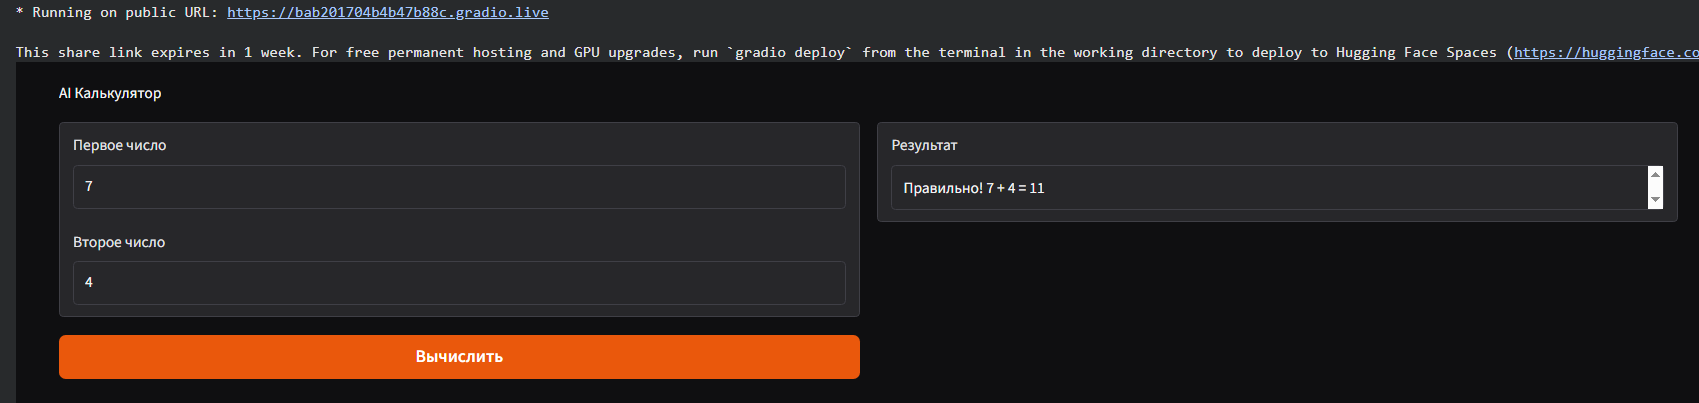

### Выводы

В этом задании вы научились решать арифметические действия с помощью языковой модели.